In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms

ms.use('seaborn-muted')
%matplotlib inline

import librosa
import librosa.display

import IPython.display

In [2]:
file_path_blues = "../data/songData/genres/blues/blues.00000.wav"
y_blues, sr_blues = librosa.load(file_path_blues)

file_path_classical = "../data/songData/genres/classical/classical.00000.wav"
y_classical, sr_classical = librosa.load(file_path_classical)

file_path_disco = "../data/songData/genres/disco/disco.00001.wav"
y_disco, sr_disco = librosa.load(file_path_disco)

file_path_jazz = "../data/songData/genres/jazz/jazz.00009.wav"
y_jazz, sr_jazz = librosa.load(file_path_jazz)

In [3]:
IPython.display.Audio(data=y_blues, rate=sr_blues)

In [4]:
IPython.display.Audio(data=y_classical, rate=sr_classical)

In [5]:
IPython.display.Audio(data=y_disco, rate=sr_disco)

In [6]:
IPython.display.Audio(data=y_jazz, rate=sr_jazz)

In [7]:
def createMelspectrogram(y, sr):
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.logamplitude(S, ref_power=np.max)
    return log_S;

In [8]:
S_blues = createMelspectrogram(y_blues, sr_blues)
S_classical = createMelspectrogram(y_classical, sr_classical)
S_disco = createMelspectrogram(y_disco, sr_disco)
S_jazz = createMelspectrogram(y_jazz, sr_jazz)

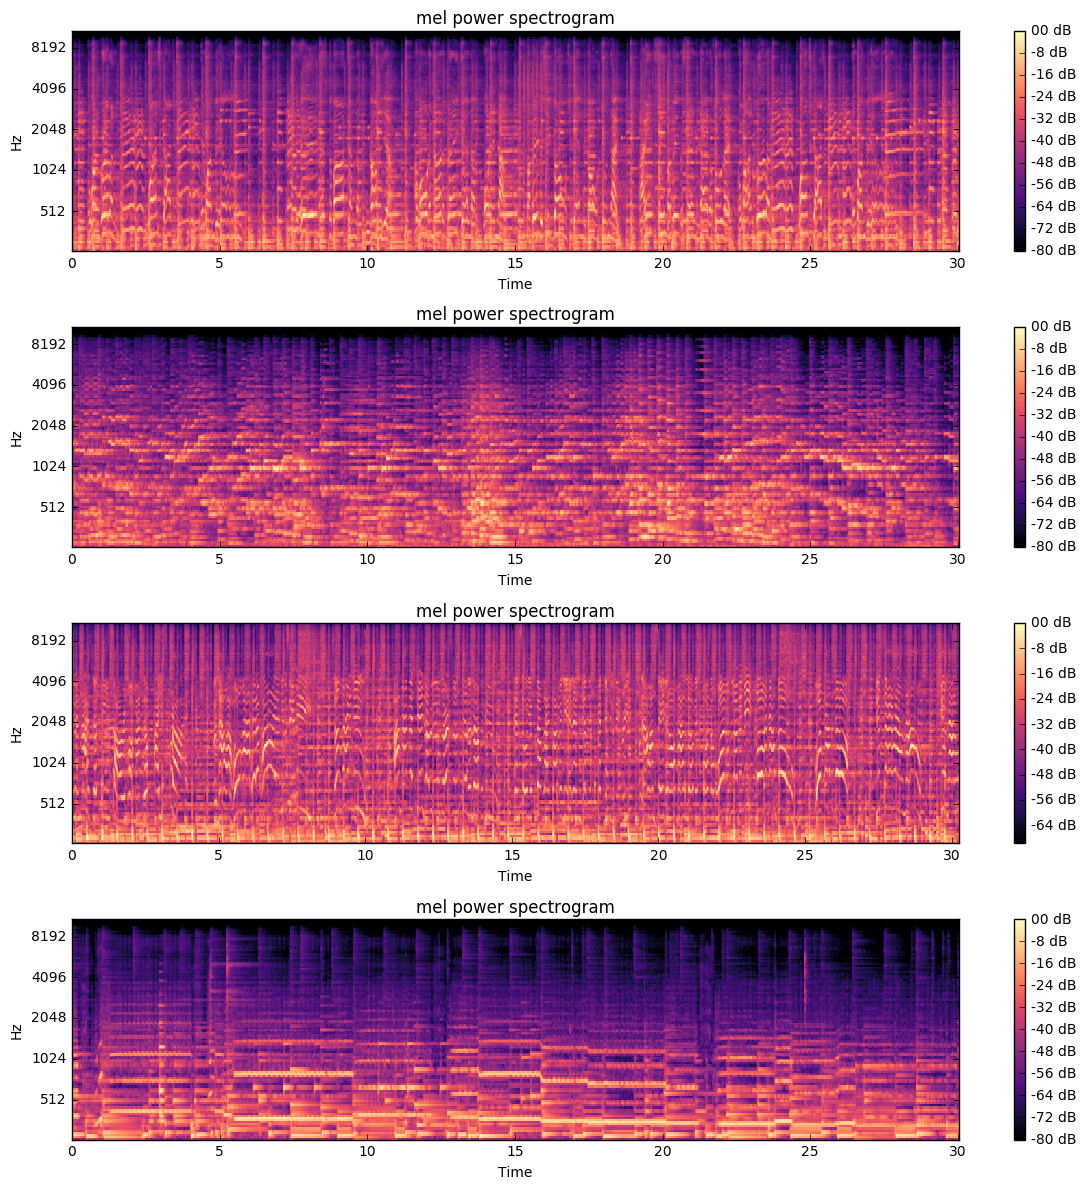

In [9]:
plt.figure(figsize=(12, 12))

plt.subplot(4, 1, 1)
librosa.display.specshow(S_blues, sr=sr_blues, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%02.0f dB')

plt.subplot(4, 1, 2)
librosa.display.specshow(S_classical, sr=sr_blues, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%02.0f dB')

plt.subplot(4, 1, 3)
librosa.display.specshow(S_disco, sr=sr_blues, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%02.0f dB')

plt.subplot(4, 1, 4)
librosa.display.specshow(S_jazz, sr=sr_blues, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%02.0f dB')

plt.tight_layout()

In [10]:
C_blues = librosa.cqt(y_blues, sr=sr_blues)
C_classical = librosa.cqt(y_classical, sr=sr_classical)
C_disco = librosa.cqt(y_disco, sr=sr_disco)
C_jazz = librosa.cqt(y_jazz, sr=sr_jazz)

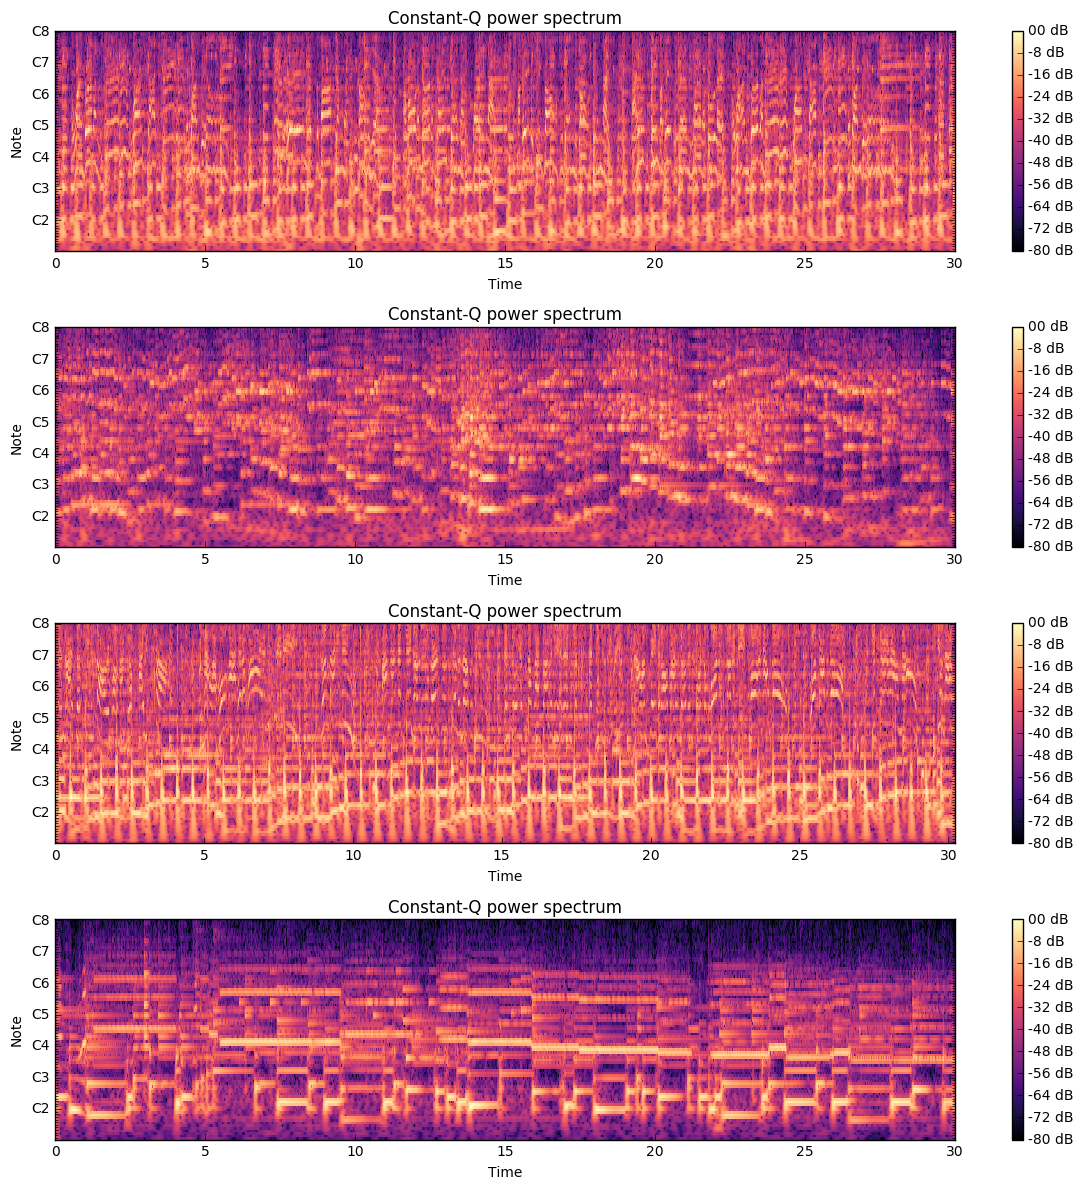

In [11]:
plt.figure(figsize=(12, 12))

plt.subplot(4, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C_blues, ref=np.max), sr=sr_blues, x_axis='time', y_axis='cqt_note')
plt.title('Constant-Q power spectrum')
plt.colorbar(format='%02.0f dB')


plt.subplot(4, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(C_classical, ref=np.max), sr=sr_classical, x_axis='time', y_axis='cqt_note')
plt.title('Constant-Q power spectrum')
plt.colorbar(format='%02.0f dB')


plt.subplot(4, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(C_disco, ref=np.max), sr=sr_disco, x_axis='time', y_axis='cqt_note')
plt.title('Constant-Q power spectrum')
plt.colorbar(format='%02.0f dB')


plt.subplot(4, 1, 4)
librosa.display.specshow(librosa.amplitude_to_db(C_jazz, ref=np.max), sr=sr_jazz, x_axis='time', y_axis='cqt_note')
plt.title('Constant-Q power spectrum')
plt.colorbar(format='%02.0f dB')

plt.tight_layout()

In [12]:
chroma_stft = librosa.feature.chroma_stft(y=y_blues, sr=sr_blues, n_chroma=12, n_fft=4096)
chroma_cqt = librosa.feature.chroma_cqt(y=y_blues, sr=sr_blues)

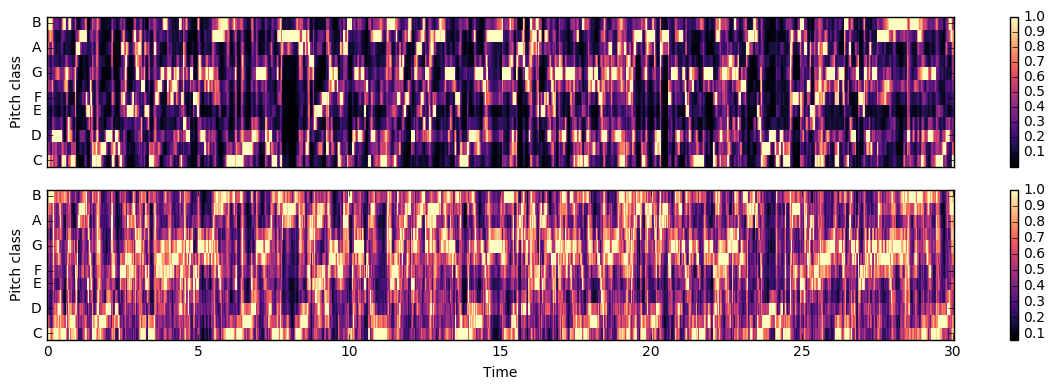

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_stft, y_axis='chroma')
plt.colorbar()

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_cqt, y_axis='chroma', x_axis='time')
plt.colorbar()

plt.tight_layout()